# Visvalizing: K-Means VS DBSCAN

**Task:** Visualize the K-Means and DBSCAN clustering algorithms uisng `make_blobs`, `make_moons`, and `make_circles` datasets.

The datasets are generated using `sklearn.datasets` for comparing the two models and visualizing the results.

To learn more about the models, visit the following implementations in this repository:
1. [K-Means Clustering](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/tree/main/Unsupervised_Learning/1_k_means_clustering)
2. [DBSCAN Clustering](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/tree/main/Unsupervised_Learning/2_DBSCAN)

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles
import seaborn as sns

## Generate Data
Data is generated using the `make_blobs`, `make_moons`, and `make_circles` function from the `sklearn.datasets` module.

The datasets blobs, moon, and circles are synthetic datasets commonly used in machine learning research to test and compare algorithms' performance.

1. **Blobs:** This dataset consists of randomly generated Gaussian blobs, i.e., groups of points with a Gaussian distribution around them. The blobs are usually well-separated and have different numbers of clusters, making it a good dataset to test clustering algorithms.

2. **Moon:** This dataset consists of two half-moon shapes, with one moon above the other. It is commonly used to test algorithms' ability to separate non-linearly separable data.

3. **Circles:** This dataset consists of two concentric circles, with one circle inside the other. It is also commonly used to test algorithms' ability to separate non-linearly separable data.

In [2]:
# create datasets using sklearn.datasets
# Blobs Dataset
blobs, blob_labels = make_blobs(n_samples=1000, centers=3, random_state=42)
# Moons Dataset
moons, moon_labels = make_moons(n_samples=500, noise=0.1, random_state=42)
# Circles Dataset
circles, circle_labels = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

## Data Visualization

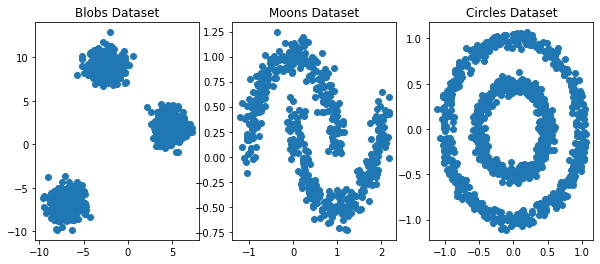

In [3]:
# Plot the datasets
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

axes[0].scatter(blobs[:, 0], blobs[:, 1])
axes[0].set_title("Blobs Dataset")

axes[1].scatter(moons[:, 0], moons[:, 1])
axes[1].set_title("Moons Dataset")

axes[2].scatter(circles[:, 0], circles[:, 1])
axes[2].set_title("Circles Dataset")

plt.show()

In [4]:
# Helper function to plot the clusters for each model and dataset
def plot_clusters(X, labels, title):
    # Separate the outliers from the rest of the data
    outliers = X[labels == -1]
    inliers = X[labels != -1]
    
    # Create the scatterplot of inlier data with cluster labels
    sns.scatterplot(x=inliers[:, 0], y=inliers[:, 1], hue=labels[labels != -1],
                    palette='Set2', legend='full', s=50)
    
    # Add the scatterplot of outlier data with outlier label
    plt.scatter(outliers[:, 0], outliers[:, 1], s=10, label='Outliers', c="k")
    # Add the legend and title
    plt.legend()
    plt.title(title, fontsize=14)
    # Show the plot
    plt.show()

### Comparison: Blobs Dataset

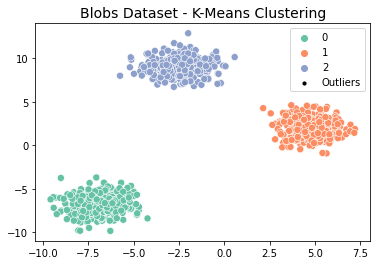

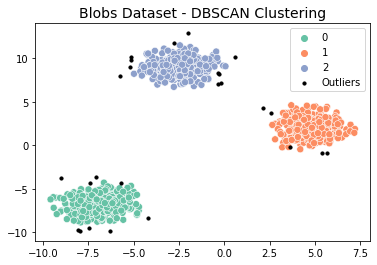

In [5]:
# K-Means Clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
blobs_kmeans_labels = kmeans.fit_predict(blobs)
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
blobs_dbscan_labels = dbscan.fit_predict(blobs)
# Plot the results
plot_clusters(blobs, blobs_kmeans_labels, "Blobs Dataset - K-Means Clustering")
plot_clusters(blobs, blobs_dbscan_labels, "Blobs Dataset - DBSCAN Clustering")

### Comparison: Moons Dataset

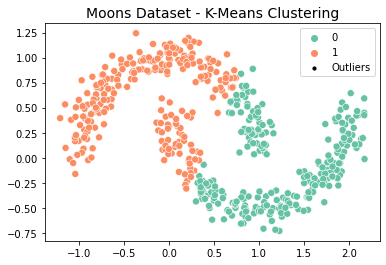

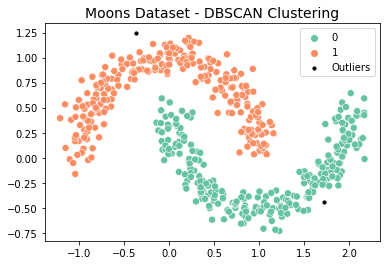

In [17]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
moons_kmeans_labels = kmeans.fit_predict(moons)
# DBSCAN Clustering
dbscan_moons = DBSCAN(eps=0.15, min_samples=5)
moons_dbscan_labels = dbscan_moons.fit_predict(moons)
# Plot the results
plot_clusters(moons, moons_kmeans_labels, "Moons Dataset - K-Means Clustering")
plot_clusters(moons, moons_dbscan_labels, "Moons Dataset - DBSCAN Clustering")

### Comparison: Circles Dataset

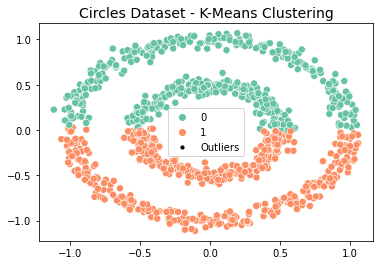

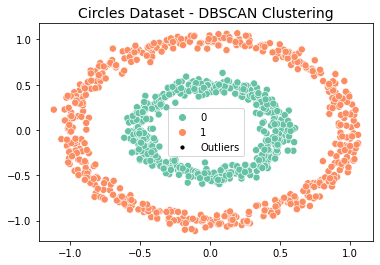

In [19]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
circles_kmeans_labels = kmeans.fit_predict(circles)
# DBSCAN Clustering
dbscan_circles = DBSCAN(eps=0.15, min_samples=5)
circles_dbscan_labels = dbscan_circles.fit_predict(circles)
# Plot the results
plot_clusters(circles, circles_kmeans_labels, "Circles Dataset - K-Means Clustering")
plot_clusters(circles, circles_dbscan_labels, "Circles Dataset - DBSCAN Clustering")

## Conclusion
The comparison of DBSCAN and K-Means using Blobs, Moons, and Circles data shows that DBSCAN can detect shapes better than K-Means. 
1. **Blobs Data**: Similar clusters are detected by both algorithms. However, DBSCAN was able to detect the outliers as well. 
2. **Moons Data**: DBSCAN was able to identify the two crescent-shaped clusters in the moons dataset, while k-means failed to identify the clusters.
3. **Circles Data**: DBSCAN was able to identify the two concentric circles in the circles dataset, while k-means failed to identify the clusters. K-means is not suitable for data with varying densities and shapes like the circles dataset.

In summary, DBSCAN is a better choice than k-means for clustering non-linear and complex datasets with varying densities and shapes.